In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (8, 6)

In [5]:
header_list = ["age","workclass","fnlwgt","education","education_num","marital-status","occupation",
               "relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country",
               "income"] #15 columns (14 features, 1 target).
dataset = pd.read_csv("C:/Users/ksmin/ds_teamproject/Dataset/Adult Data.csv", names=header_list)

print(dataset.info())
print()
print(dataset.isna().sum()) #non-null data.
print()
print(dataset.columns)#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

age               0
workclass         0
fnlwgt            0
education         0
educati

In [6]:
#dataset의 types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [7]:
#dataset의 describe 파악.
dataset.describe(include = 'all')

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
#dataset의 변수값들 출력. 이상치 데이터 ?는 column workclass, occupation, native-country가 있다. 
for i in dataset.columns:
    print(i, '\n', dataset[i].unique(), '\n')

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt 
 [ 77516  83311 215646 ...  34066  84661 257302] 

education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

education_num 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Fa

In [9]:
#check the number of '?' present in each column
for i in dataset.columns:
    print(i, ':', sum(dataset[i] == ' ?'))

age : 0
workclass : 1836
fnlwgt : 0
education : 0
education_num : 0
marital-status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
capital-gain : 0
capital-loss : 0
hours-per-week : 0
native-country : 583
income : 0


In [10]:
#?를 replace를 한다.
print(dataset[(dataset['workclass']==' ?')&(dataset['occupation']==' ?')].shape[0])
print(dataset[dataset['workclass']==' ?'].shape[0])

#즉 dataset['workclass', 'occupation']에 있는 ? 결측치가 존재하는 행은같다 이유:1836개가 ?인 값을 지닌 
#workclass는 1843개가 ?인 값을 지닌 occupation에 포함이 되기 때문이다.


1836
1836


In [11]:
dataset['income'] = dataset['income'].map(lambda x: 1 if x==' >50K' else 0)

In [12]:
print(dataset[['income']].value_counts())

income
0         24720
1          7841
Name: count, dtype: int64


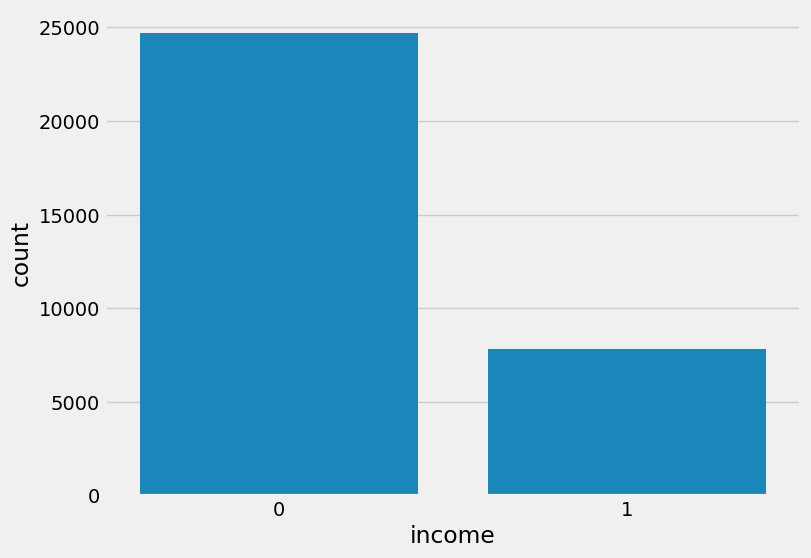

In [13]:
#현재 전체 데이터에서는 0이 압도적으로 많은 상태이다.
sns.countplot(x='income', data=dataset)
plt.show()

In [14]:
#train 데이터를 살펴보자
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=2024)

print(train_data.shape)

(22792, 15)


In [15]:
train_data[['income']].value_counts()

income
0         17260
1          5532
Name: count, dtype: int64

## Target ratio check

- />50 income = 1
- <=50 income = 0

<Axes: xlabel='income', ylabel='count'>

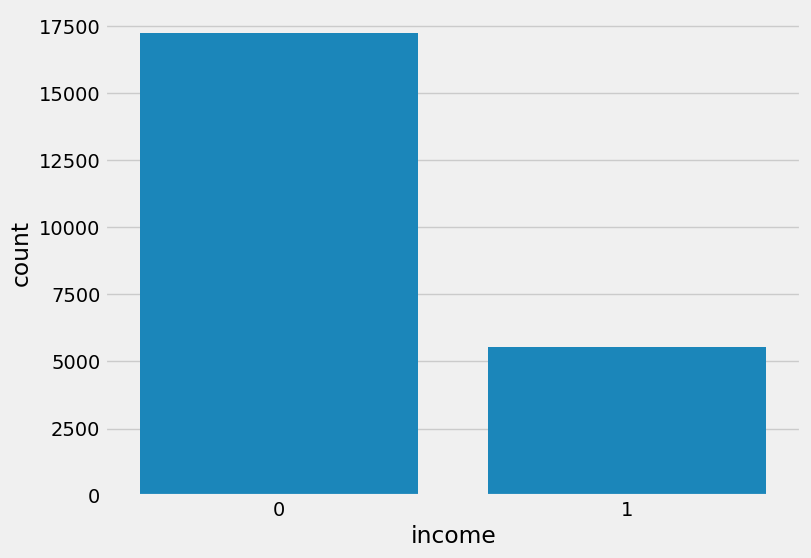

In [16]:
#target은 0이 1보다 많은 상황이다. -> 비중이 1/3이기 때문에 undersampling과정이 필요. 모델의 성능을 올리기 위해서는 불균형 데이터 문제.
sns.countplot(x='income', data = train_data)

### Age와 Target의 관계도

In [17]:
print("The age range is {} ~ {}".format(train_data['age'].min(), train_data['age'].max()))
print("Average Age is {:.2f}".format(train_data['age'].mean()))

The age range is 17 ~ 90
Average Age is 38.54


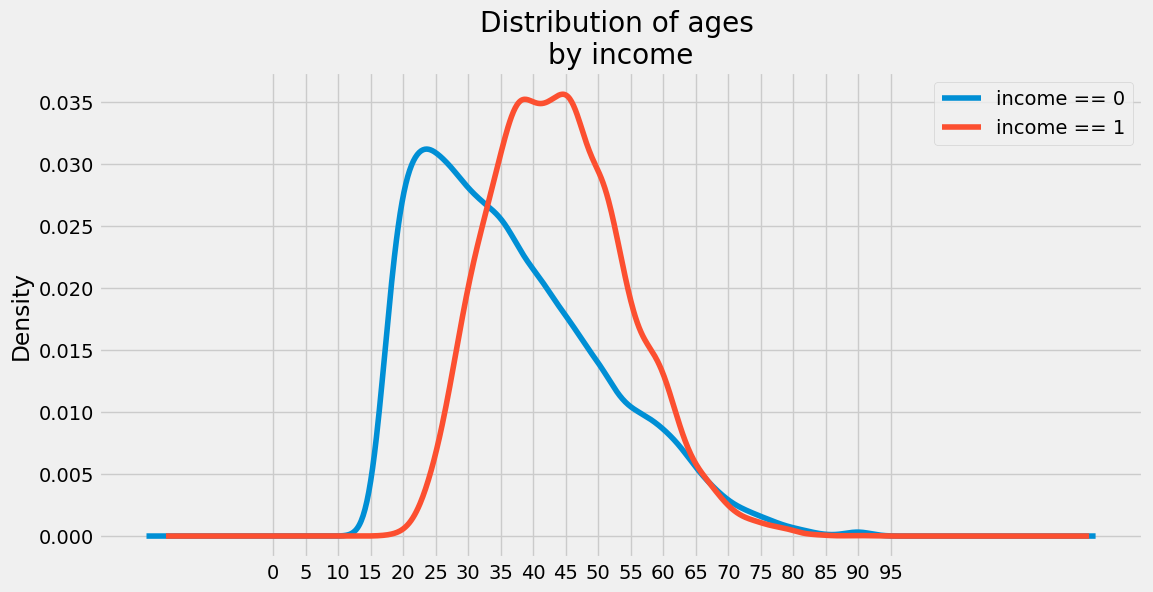

In [18]:
# 소득에 따른 연령 구분
#나이가 많을 수록 소득이 올라가는 형태이다.
plt.figure(figsize=(12, 6))

train_data.loc[train_data['income'] == 0, 'age'].plot(kind='kde', label='income == 0')
train_data.loc[train_data['income'] == 1, 'age'].plot(kind='kde', label='income == 1')

plt.title('Distribution of ages \nby income')
plt.xticks(range(0, 100, 5))
plt.legend()
plt.show()

## fnlwgt feature Check : Final weight


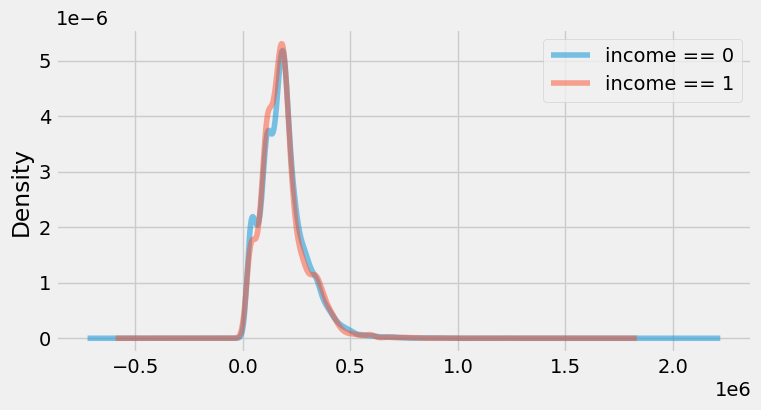

In [19]:
#data description에서 fnlwgt는 가중치를 의미한다. 대졸이고 결혼을 했고 하면 가중치가 올라간다는 의미이다. 
#fnlwgt가 모집단에서 차지하는 비율을 나타낸 것이다. 
#fnlwgt는 딱히 target값과 관계가 없다.
plt.figure(figsize=(8, 4))

train_data.loc[train_data['income'] == 0, 'fnlwgt'].plot(kind='kde', alpha=0.5, label='income == 0')
train_data.loc[train_data['income'] == 1, 'fnlwgt'].plot(kind='kde', alpha=0.5, label='income == 1')

plt.legend()
plt.show()

## Education_num check Target

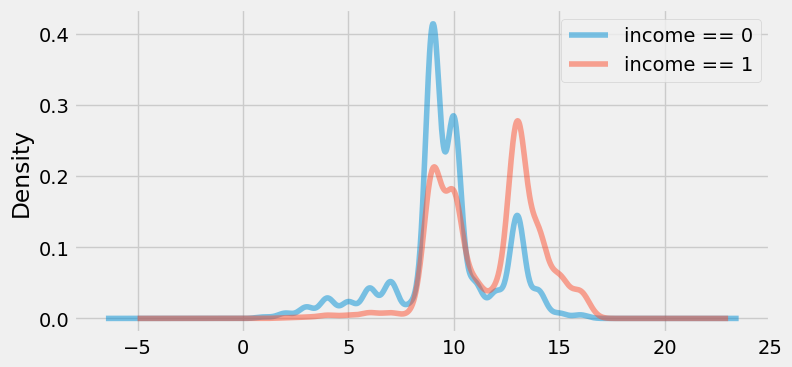

The education_num range is 1 ~ 16


In [20]:
#education_num과의 관계에서는 target을 분리할 수가 있다.
plt.figure(figsize=(8, 4))

train_data.loc[train_data['income'] == 0, 'education_num'].plot(kind='kde', alpha=0.5, label='income == 0')
train_data.loc[train_data['income'] == 1, 'education_num'].plot(kind='kde', alpha=0.5, label='income == 1')

plt.legend()
plt.show()

print("The education_num range is {} ~ {}".format(train_data['education_num'].min(), train_data['education_num'].max()))

## hours-per-week check


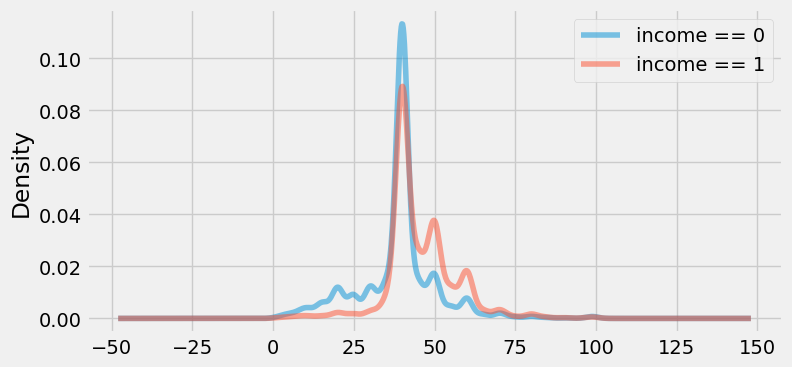

The working hours per week 1 ~ 99


In [21]:
#주당 근무시간은 딱히 상관이 없다.
plt.figure(figsize=(8, 4))

train_data.loc[train_data['income'] == 0, 'hours-per-week'].plot(kind='kde', alpha=0.5, label='income == 0')
train_data.loc[train_data['income'] == 1, 'hours-per-week'].plot(kind='kde', alpha=0.5, label='income == 1')

plt.legend()
plt.show()

print("The working hours per week {} ~ {}".format(train_data['hours-per-week'].min(), train_data['hours-per-week'].max()))

## Capital - gain, Capital - loss Check

- capital gain이 0이 아니면서 target값이 0인경우가 target이 1인 경우보다 훨씬 많다.
    즉 Capital gain이 있으면 target값이 0과 가까워진다.

- capital loss가 0이 아니면 target값이 1인 경우가 target이 0인 경우보다 훨씬 많다.
    즉 Capital loss가 있으면 target값이 1과 가까워진다.

### 그럼 Capital gain과 Capital loss는 뭘까?

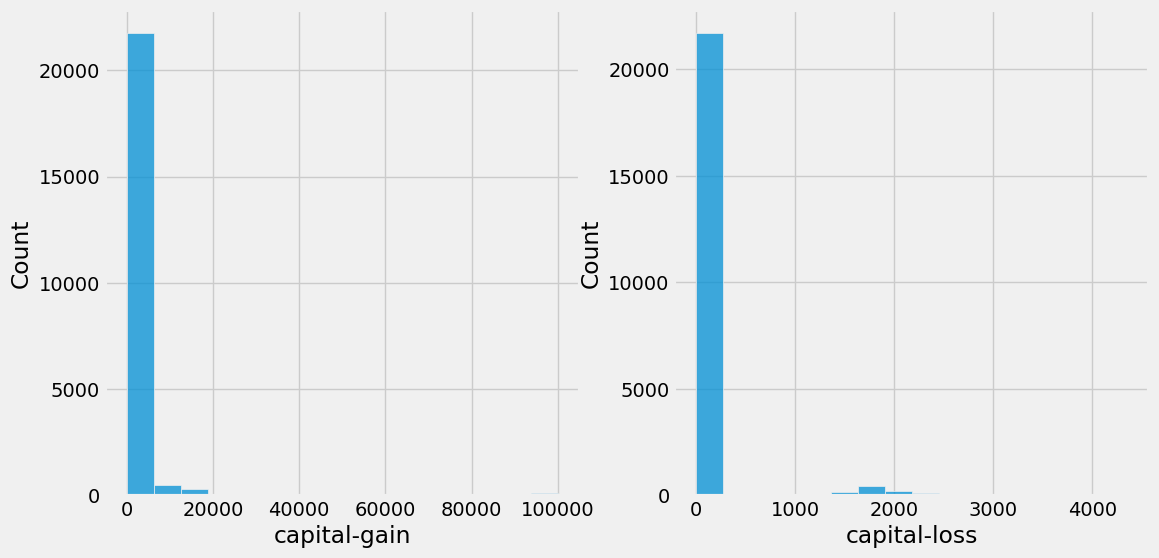

In [22]:
#data중에서 값이 0인 데이터가 너무 많기 때문에 0인 아닌 데이터의 비율을 체크한다.
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(train_data['capital-gain'],kde=False, ax=ax[0])
sns.histplot(train_data['capital-loss'],kde=False, ax=ax[1])

plt.show()

In [23]:
capital_gain_notzero = train_data.loc[train_data['capital-gain']!=0]
capital_loss_notzero = train_data.loc[train_data['capital-loss']!=0]

print("Capital-gain: {}\t{:.2f}".format(len(capital_gain_notzero),len(capital_gain_notzero)/len(train_data)*100))
print("Capital-loss: {}\t{:.2f}".format(len(capital_loss_notzero),len(capital_loss_notzero)/len(train_data)*100))

#Capital-gain에서 0이 아닌 값은 8.28%
#Capital-loss에서 0이 아닌 값은 4.73%

Capital-gain: 1888	8.28
Capital-loss: 1077	4.73


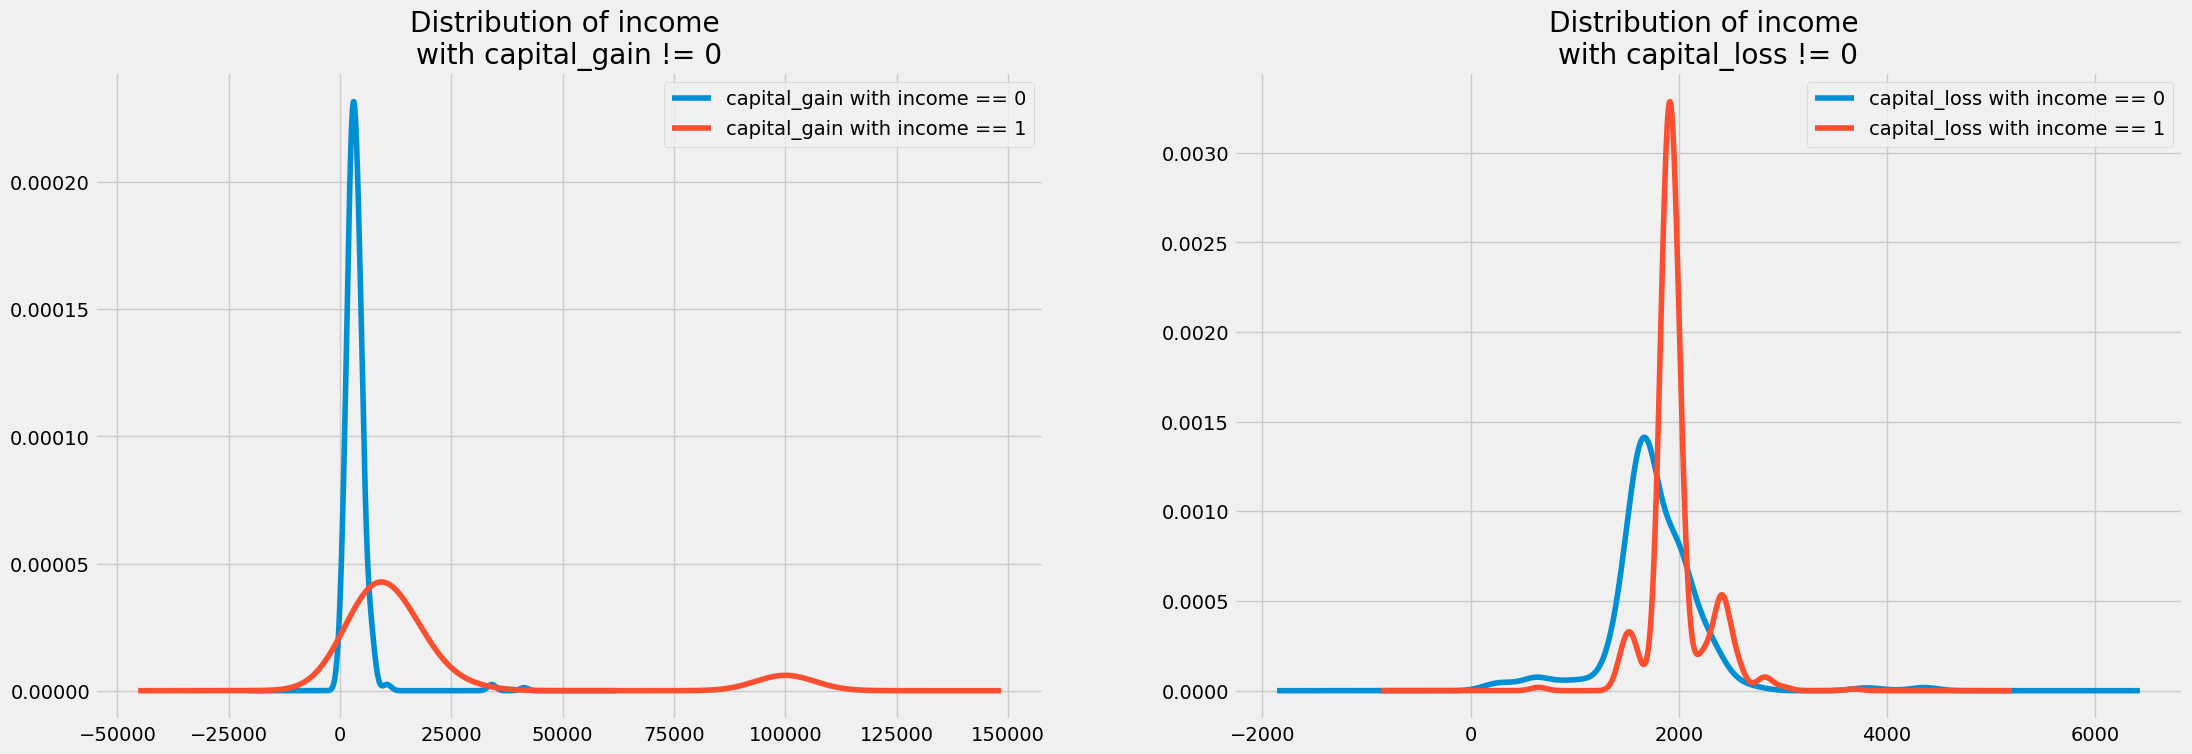

In [24]:
# 0이 아닌 데이터에 대하여 타겟에 따른 분포 확인
#share x, y를 통해 capital gain, loss에 대한 모집단에서의 target과의 관계를 확인.
#sharey를 통해 분포력 즉 모집단에서 얼마 만큼의 크기가 집중이 되어있는 지 확인 but 각각의 feature안에 분포되어있는 비율이 다르기 때문에 의미가 없다.
#sharex는 분포력, target과의 관계를 보기 위해서 굳이 x즉 feature value값들을 확인할 필요가 없다.
fig, ax = plt.subplots(1, 2, figsize=(24, 8))


# capital_gain이 0이 아닌 데이터에 대한 income 비교
train_data.loc[(train_data['capital-gain'] != 0) & (train_data['income'] == 0), 'capital-gain'].plot(kind='kde', label='capital_gain with income == 0', ax=ax[0])
train_data.loc[(train_data['capital-gain'] != 0) & (train_data['income'] == 1), 'capital-gain'].plot(kind='kde', label='capital_gain with income == 1', ax=ax[0])

ax[0].set_title('Distribution of income \nwith capital_gain != 0')
ax[0].set_ylabel('')
ax[0].legend()


# capital_loss가 0이 아닌 데이터에 대한 income 비교
train_data.loc[(train_data['capital-loss'] != 0) & (train_data['income'] == 0), 'capital-loss'].plot(kind='kde', label='capital_loss with income == 0', ax=ax[1])
train_data.loc[(train_data['capital-loss'] != 0) & (train_data['income'] == 1), 'capital-loss'].plot(kind='kde', label='capital_loss with income == 1', ax=ax[1])

ax[1].set_title('Distribution of income \nwith capital_loss != 0')
ax[1].set_ylabel('')
ax[1].legend()

plt.show()

## Education, Education_num Check

In [25]:
train_data[['education', 'education_num']].value_counts()

education     education_num
HS-grad       9                7323
Some-college  10               5122
Bachelors     13               3736
Masters       14               1220
Assoc-voc     11                981
11th          7                 806
Assoc-acdm    12                731
10th          6                 670
7th-8th       4                 448
Prof-school   15                420
9th           5                 363
12th          8                 299
Doctorate     16                284
5th-6th       3                 246
1st-4th       2                 113
Preschool     1                  30
Name: count, dtype: int64

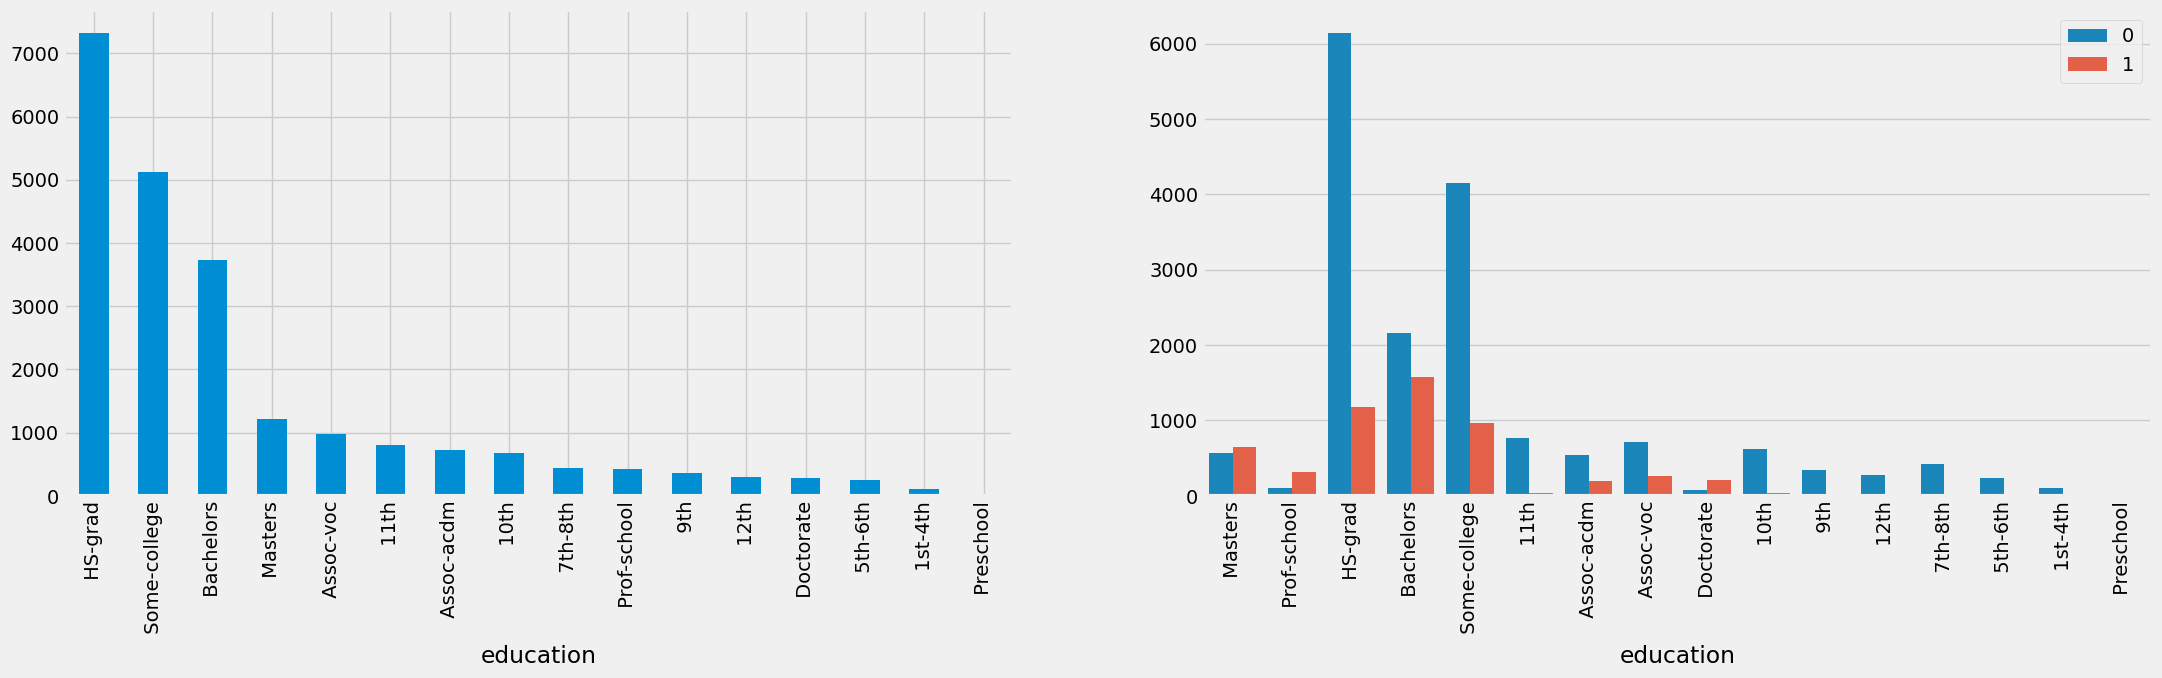

In [26]:
# education 분포 확인
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

train_data['education'].value_counts().plot(kind='bar', ax=ax[0])

# 타겟에 따른 분포 확인
sns.countplot(x='education', hue='income', data=train_data, ax=ax[1])
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(loc='upper right')
ax[1].set_ylabel('')

plt.show()

#분포도에 따르면 HS-grad (high school 졸업자가 가장 많고), Barchelors 학사학위를 준비하는 사람들이다. -> target 1에 대해 분포도를 보여준다.

## WorkClass, Occupation의 ?값을 Drop하고 target과의 분석

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


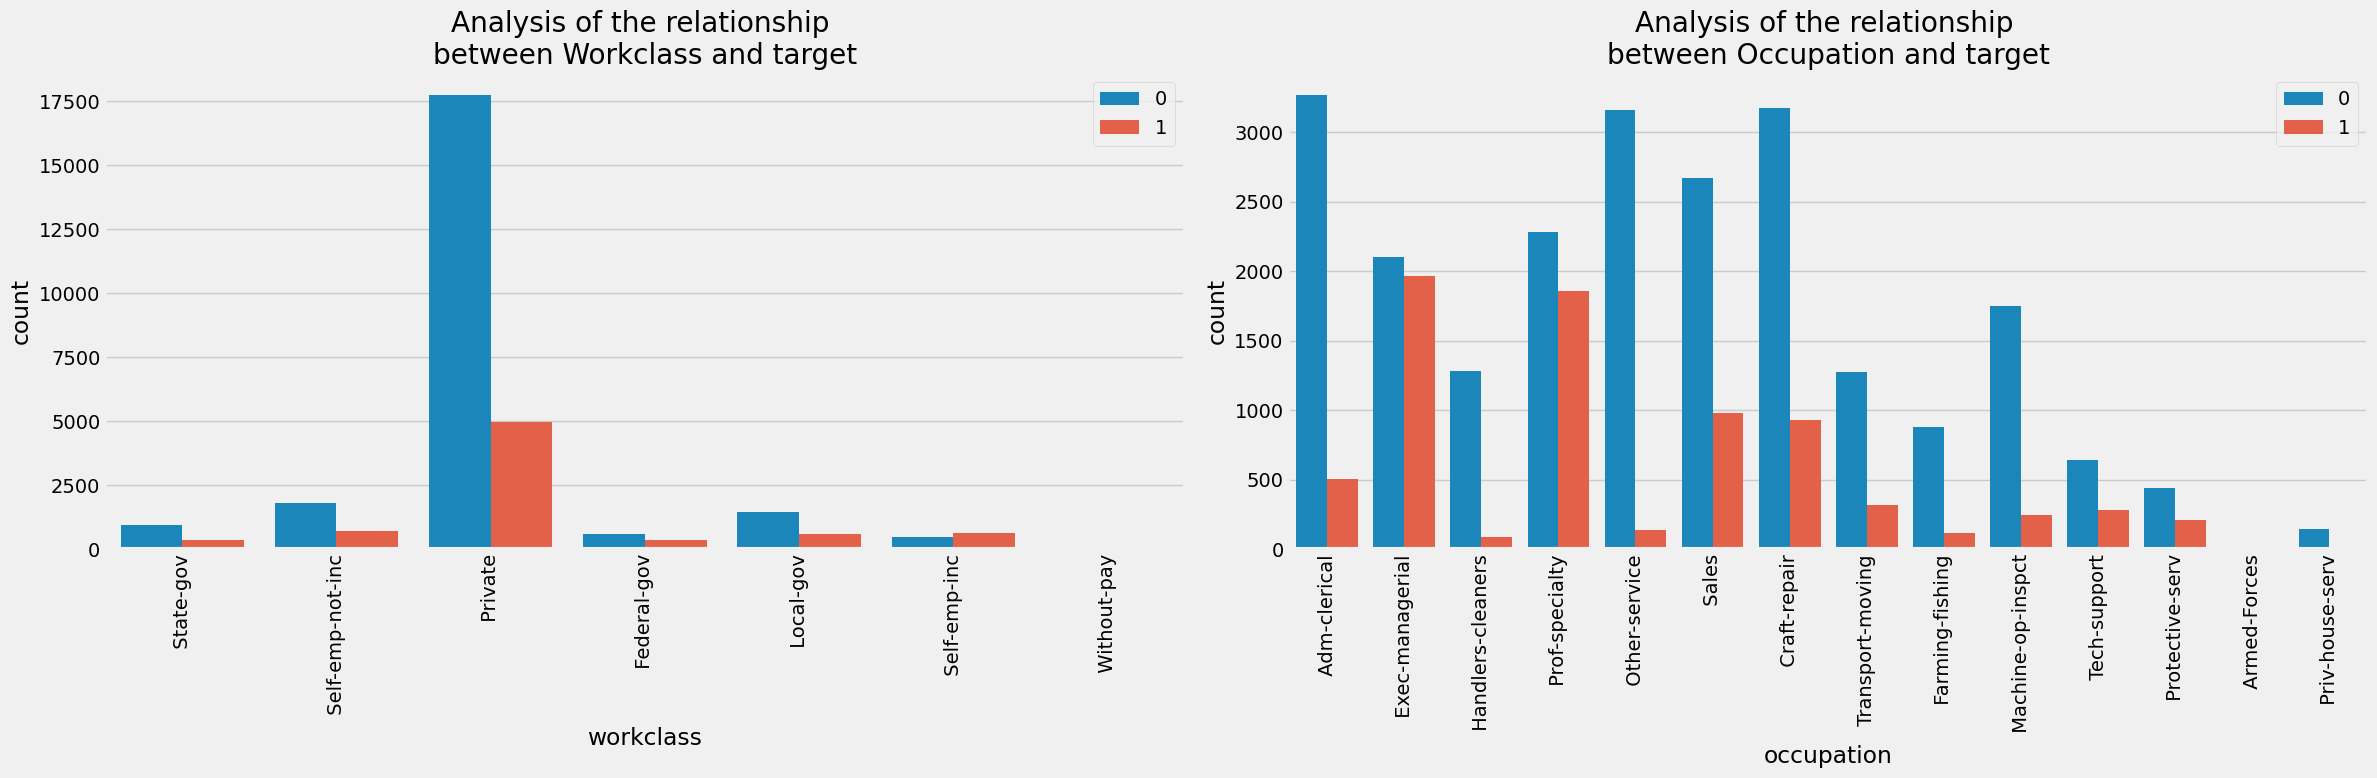

In [27]:
cleaned_dataset = dataset[(dataset['workclass']!=' ?')&(dataset['occupation']!=' ?')]

print(cleaned_dataset['workclass'].unique())
fig, ax = plt.subplots(1, 2, figsize=(24,8))
# Workclass와 target의 관계 분석
sns.countplot(data=cleaned_dataset, x='workclass', hue='income', ax=ax[0])
ax[0].legend(loc = 'upper right')
ax[0].tick_params(axis='x', labelrotation=90) #말이 길기 때문에 90도 회전을 한다.
ax[0].set_title("Analysis of the relationship \nbetween Workclass and target")

# Occupation과 target의 관계 분석
sns.countplot(data=cleaned_dataset, x='occupation', hue='income', ax=ax[1])
ax[1].legend(loc = 'upper right')
ax[1].set_title("Analysis of the relationship \nbetween Occupation and target")
ax[1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

#Occupation이랑 ' ?' 차이가 나는 이유는 Workclass에서 Never-worked가 존재하기 때문에 Occupation은 추가적인 ' ?' 7개가 존재한다.

## WorkClass, Occupation의 ?값을 Drop하지 않고 target과의 분석
- ' ?' 값이 target에게 어떤 영향을 주는 지 확인

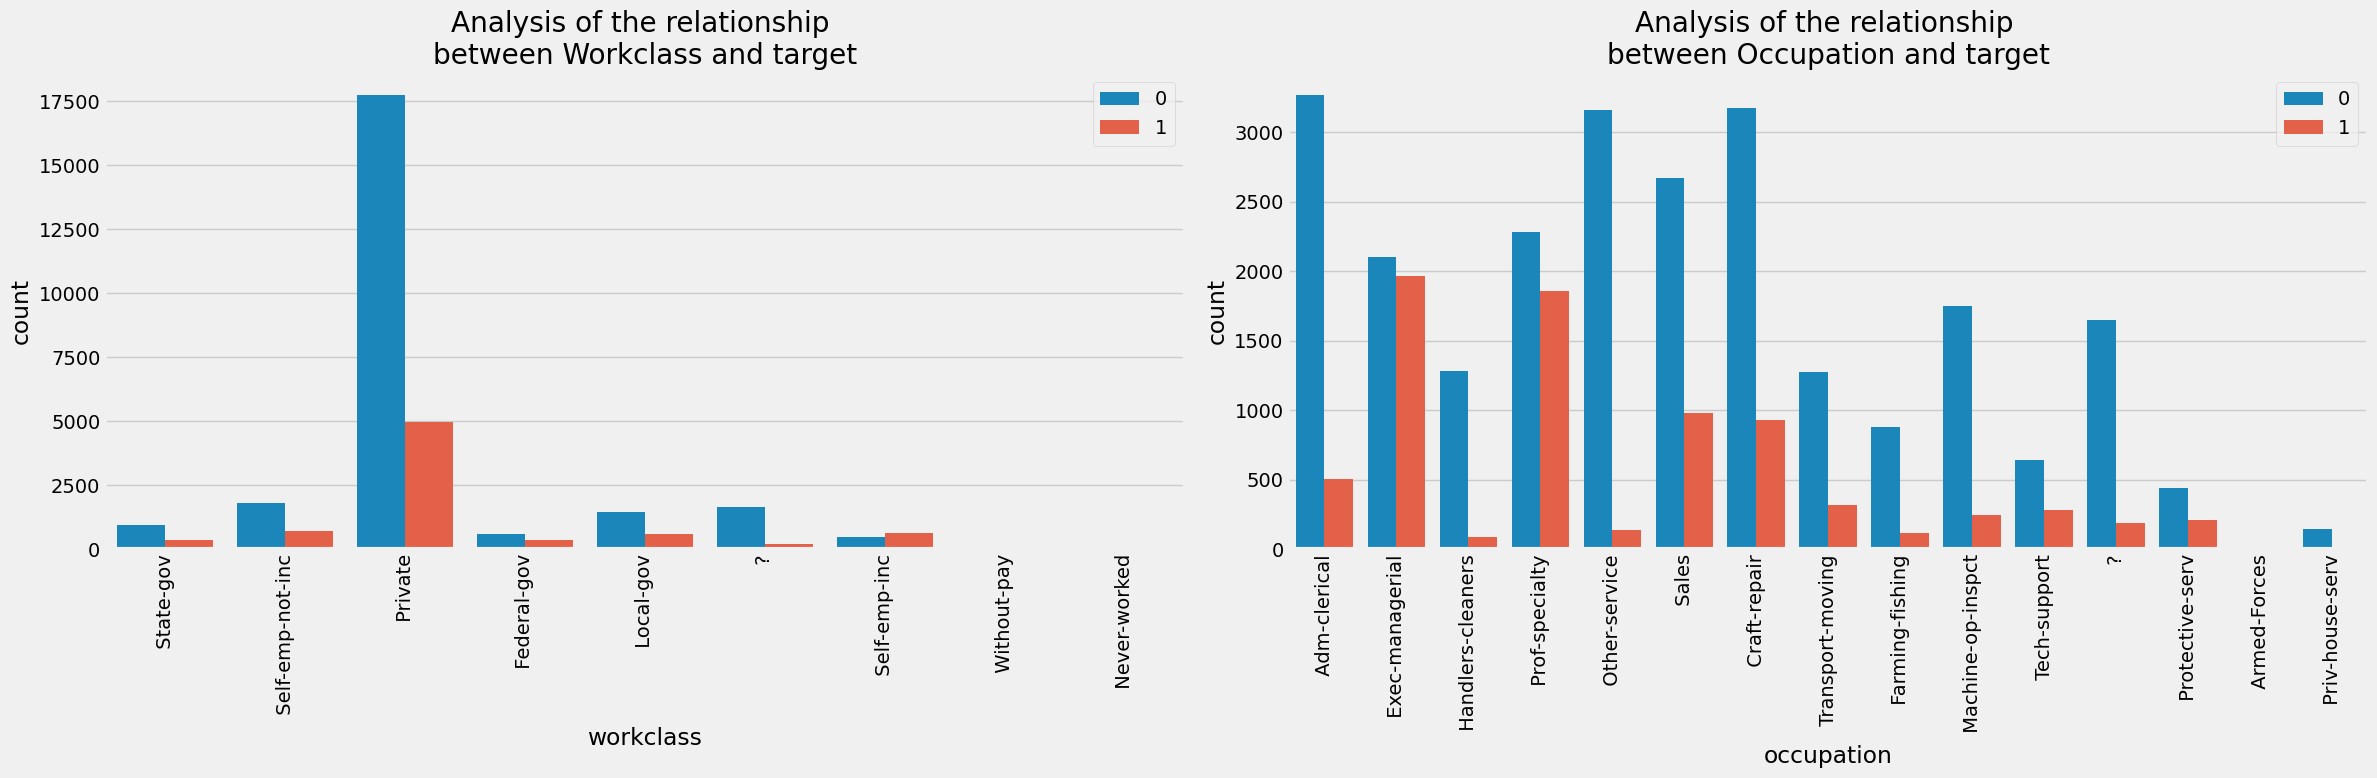

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
# Workclass와 target의 관계 분석
sns.countplot(data=train_data, x='workclass', hue='income', ax=ax[0])
ax[0].legend(loc = 'upper right')
ax[0].tick_params(axis='x', labelrotation=90) #말이 길기 때문에 90도 회전을 한다.
ax[0].set_title("Analysis of the relationship \nbetween Workclass and target")

# Occupation과 target의 관계 분석
sns.countplot(data=train_data, x='occupation', hue='income', ax=ax[1])
ax[1].legend(loc = 'upper right')
ax[1].set_title("Analysis of the relationship \nbetween Occupation and target")
ax[1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

#' ?'가 각각의 feature에서 target과의 관련성이 없지는 않기 때문에 단순 행을 drop하는 것은 좋지 않은 결과를 야기할 거 같다.
# 따라서 ?값을 처리하는 방법이 중요하다. -> 모델의 성능을 높일 수 있다.

## marital - status, relationship
- marital - status : 결혼을 했는가 안했는 가, 이혼여부, 후에 상황
- relationship : 가족의 여부
- 둘의 컬럼이 비슷한 성격을 가질 수는 있지만, 만약 결혼을 했는데 아이가 없을 수도 있고 안했는데 있을 수도 있다는 가정하에
- 데이터를 다르게 생각해봐야한다. 만약 둘의 데이터가 target에 대해 차이를 볼 수 없으면 둘의 데이터를 동일하게 봐도 무방하다.

In [34]:
print(train_data[['marital-status']].value_counts())
print()
print(train_data[['relationship']].value_counts())

marital-status       
Married-civ-spouse       10489
Never-married             7479
Divorced                  3120
Separated                  703
Widowed                    700
Married-spouse-absent      286
Married-AF-spouse           15
Name: count, dtype: int64

relationship  
Husband           9255
Not-in-family     5842
Own-child         3548
Unmarried         2408
Wife              1081
Other-relative     658
Name: count, dtype: int64


In [32]:
#둘의관계를 보여주는 그림.
train_data[['marital-status', 'relationship']].value_counts()

marital-status         relationship  
Married-civ-spouse     Husband           9250
Never-married          Not-in-family     3324
                       Own-child         3137
Divorced               Not-in-family     1675
                       Unmarried         1136
Married-civ-spouse     Wife              1072
Never-married          Unmarried          612
                       Other-relative     406
Widowed                Not-in-family      390
Separated              Unmarried          305
                       Not-in-family      292
Widowed                Unmarried          271
Divorced               Own-child          230
Married-spouse-absent  Not-in-family      150
Married-civ-spouse     Other-relative      85
Married-spouse-absent  Unmarried           84
Divorced               Other-relative      79
Married-civ-spouse     Own-child           71
Separated              Own-child           68
                       Other-relative      38
Married-spouse-absent  Own-child          

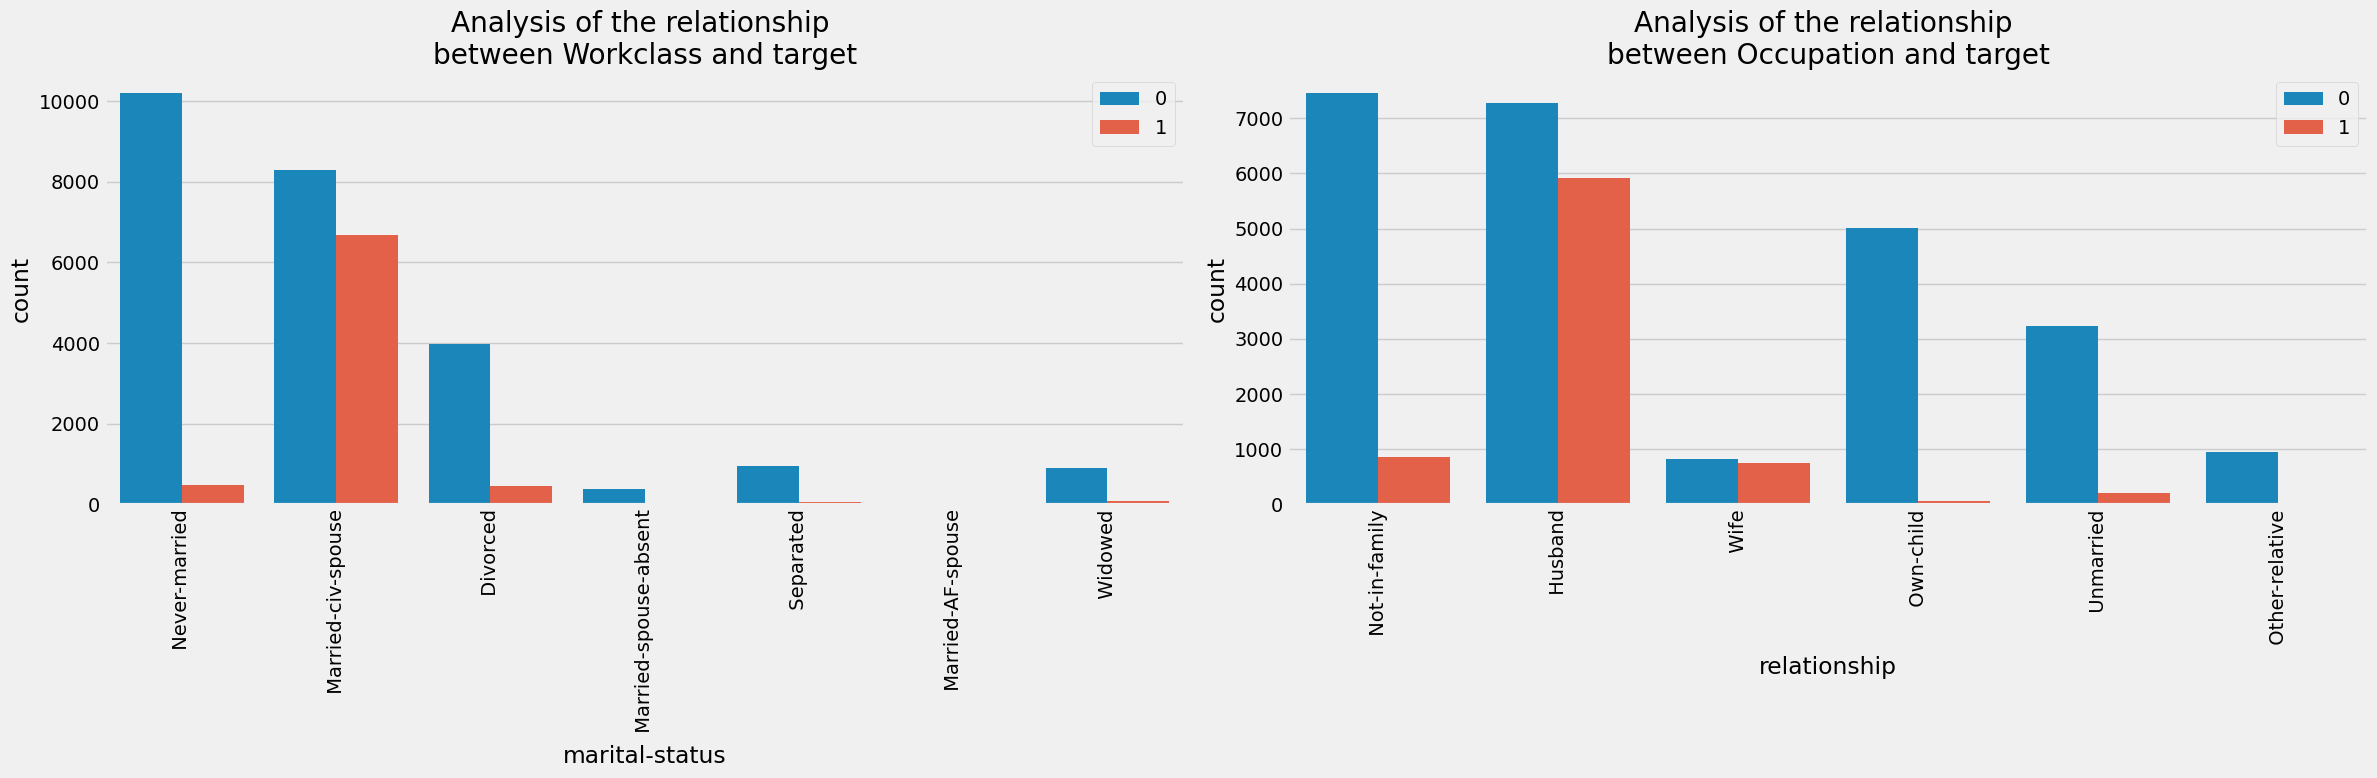

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
# marital-status와 target의 관계 분석
sns.countplot(data=train_data, x='marital-status', hue='income', ax=ax[0])
ax[0].legend(loc = 'upper right')
ax[0].tick_params(axis='x', labelrotation=90) #말이 길기 때문에 90도 회전을 한다.
ax[0].set_title("Analysis of the relationship \nbetween Workclass and target")

# relation과 target의 관계 분석
sns.countplot(data=train_data, x='relationship', hue='income', ax=ax[1])
ax[1].legend(loc = 'upper right')
ax[1].set_title("Analysis of the relationship \nbetween Occupation and target")
ax[1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

#Data의 분포를 살펴보았을 때 martial-status -> Married-civ-spouse : 10489, Never-married 7479
# relation 데이터에서 husband의 value값이 가장 많고, target이 1인 data value값은 husband에 많이 포함이 되어있다. 

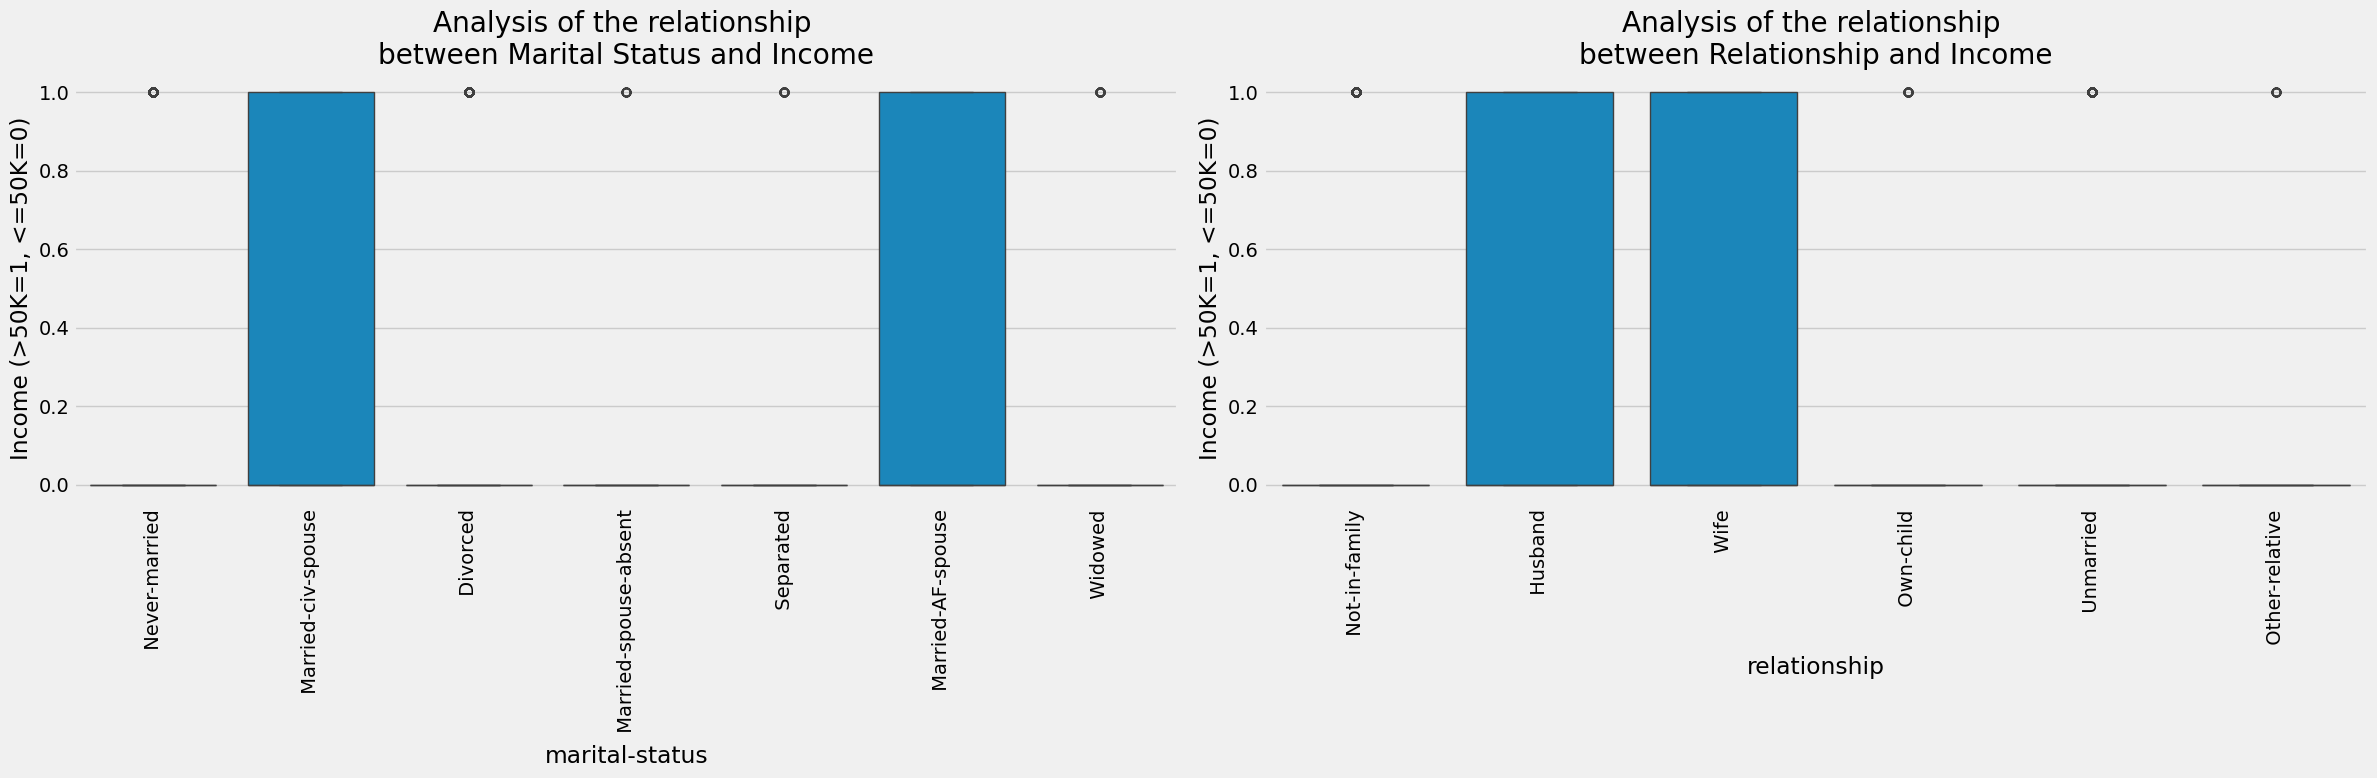

In [31]:
#box plot으로 본 경우 target데이터가 범주형이기 때문에 무의미 하다. 
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

# marital-status와 target(income)의 관계 분석 (Box Plot)
sns.boxplot(data=train_data, x='marital-status', y='income', ax=ax[0])
ax[0].set_title("Analysis of the relationship \nbetween Marital Status and Income")
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylabel('Income (>50K=1, <=50K=0)')

# relationship과 target(income)의 관계 분석 (Box Plot)
sns.boxplot(data=train_data, x='relationship', y='income', ax=ax[1])
ax[1].set_title("Analysis of the relationship \nbetween Relationship and Income")
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylabel('Income (>50K=1, <=50K=0)')

plt.tight_layout()
plt.show()

## race and sex

In [43]:
print(train_data[['race']].value_counts())
print()
print(train_data[['sex']].value_counts())

#race에서는 white 백인 데이터가 압도적으로 많고, 성별에서는 남자 데이터가 여자 데이터보다 2배가 더 많다.

race              
White                 19469
Black                  2160
Asian-Pac-Islander      737
Amer-Indian-Eskimo      225
Other                   201
Name: count, dtype: int64

sex   
Male      15308
Female     7484
Name: count, dtype: int64


In [46]:
print(train_data[['race', 'sex']].value_counts())
#white인 남성 데이터도 백인 여성보다 2배가 더 많다.

race                sex   
White               Male      13458
                    Female     6011
Black               Female     1080
                    Male       1080
Asian-Pac-Islander  Male        507
                    Female      230
Amer-Indian-Eskimo  Male        141
Other               Male        122
Amer-Indian-Eskimo  Female       84
Other               Female       79
Name: count, dtype: int64


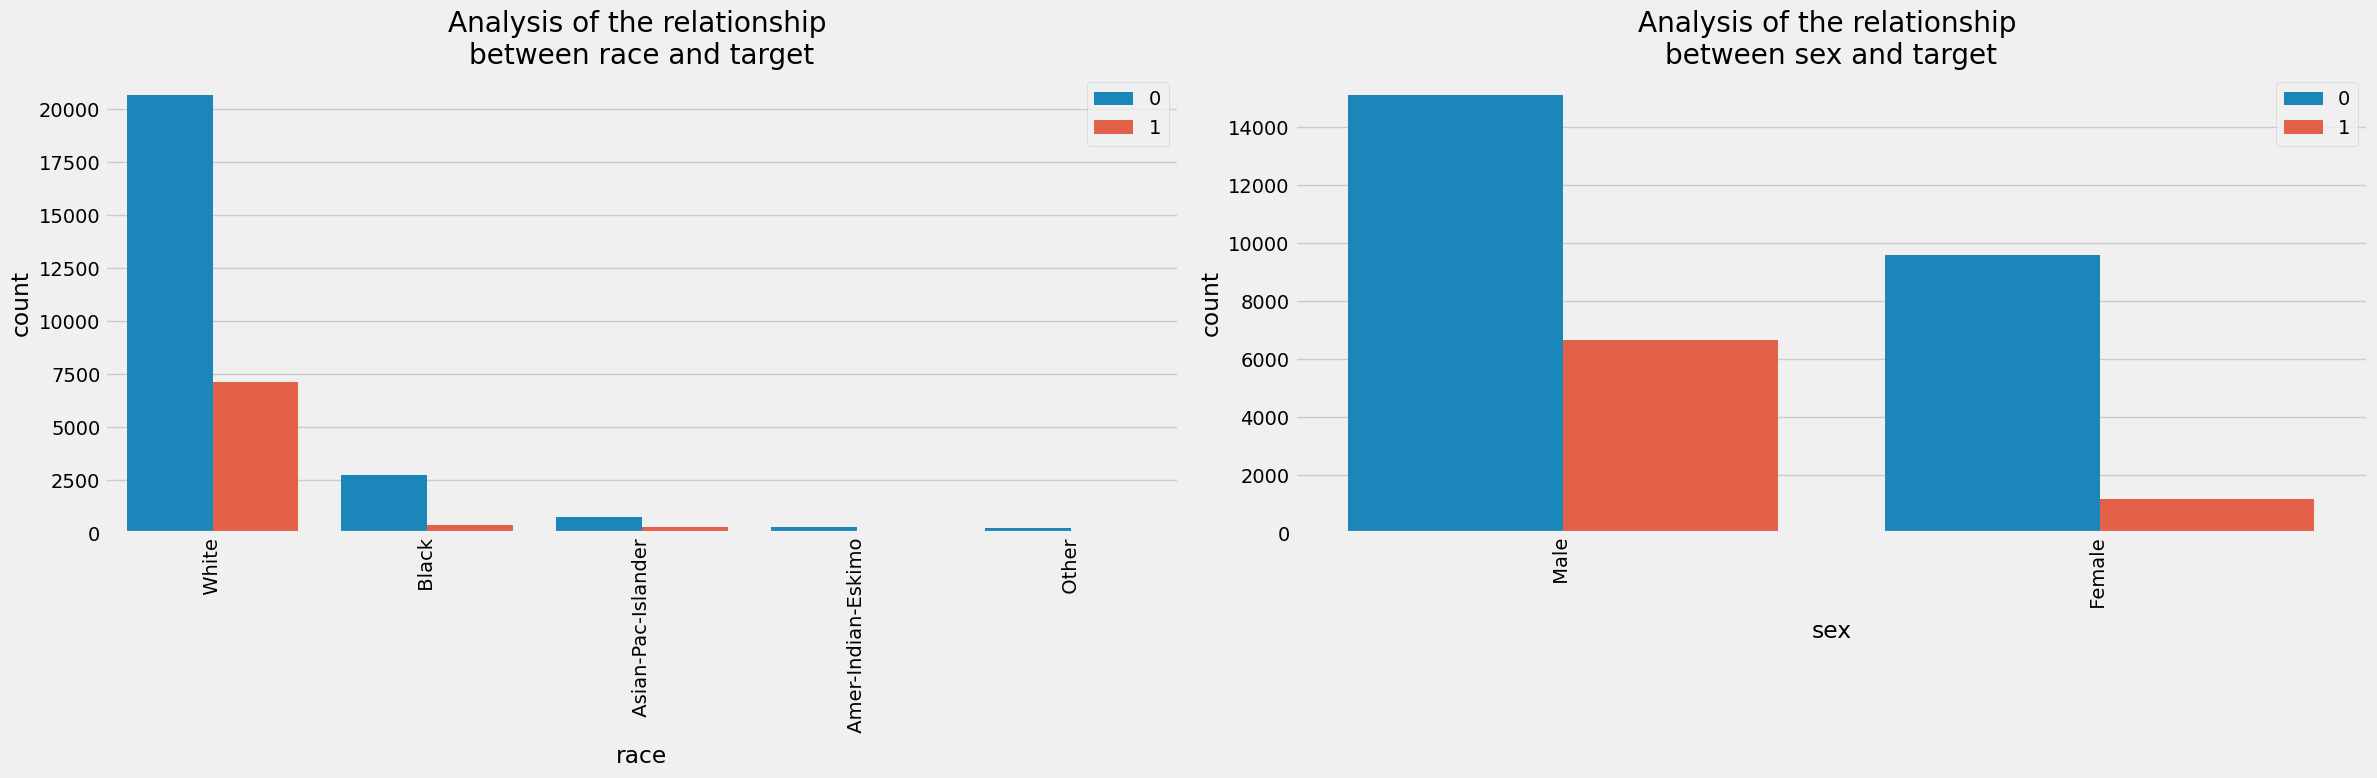

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
# race와 target의 관계 분석
sns.countplot(data=train_data, x='race', hue='income', ax=ax[0])
ax[0].legend(loc = 'upper right')
ax[0].tick_params(axis='x', labelrotation=90) #말이 길기 때문에 90도 회전을 한다.
ax[0].set_title("Analysis of the relationship \nbetween race and target")

# sex target의 관계 분석
sns.countplot(data=train_data, x='sex', hue='income', ax=ax[1])
ax[1].legend(loc = 'upper right')
ax[1].set_title("Analysis of the relationship \nbetween sex and target")
ax[1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

#데이터의 count비율을 볼 때 sex와, race는 큰 의미가 없는 것으로 보인다. target 0과 1의 데이터도 2 : 1의 비율
#한가지 중요한 점은 female일 때 target 1이 남성의 비해 2:1이 아닌 점 남자가 훨씬 많다는 점이다.

## Native - Country 
- 미국이 상대적으로 많기 때문에, 데이터를 미국인 경우 1, 아닌 경우를 0으로 bin형태로 유지.

In [50]:
print(train_data[['native-country']].value_counts())

#모국에 대한 데이터에서는 미국이 압도적으로 많다. 데이터의 그래프를 확인해봤을 때 United State가 너무 많아 확인이 안된다. 

native-country            
United-States                 20423
Mexico                          420
?                               407
Philippines                     139
Canada                           84
Germany                          84
Puerto-Rico                      82
India                            80
El-Salvador                      78
Cuba                             69
England                          61
South                            59
China                            58
Dominican-Republic               56
Jamaica                          55
Italy                            53
Columbia                         47
Guatemala                        45
Vietnam                          41
Poland                           40
Japan                            39
Taiwan                           36
Iran                             36
Haiti                            31
Portugal                         29
Peru                             25
Nicaragua                        24
F

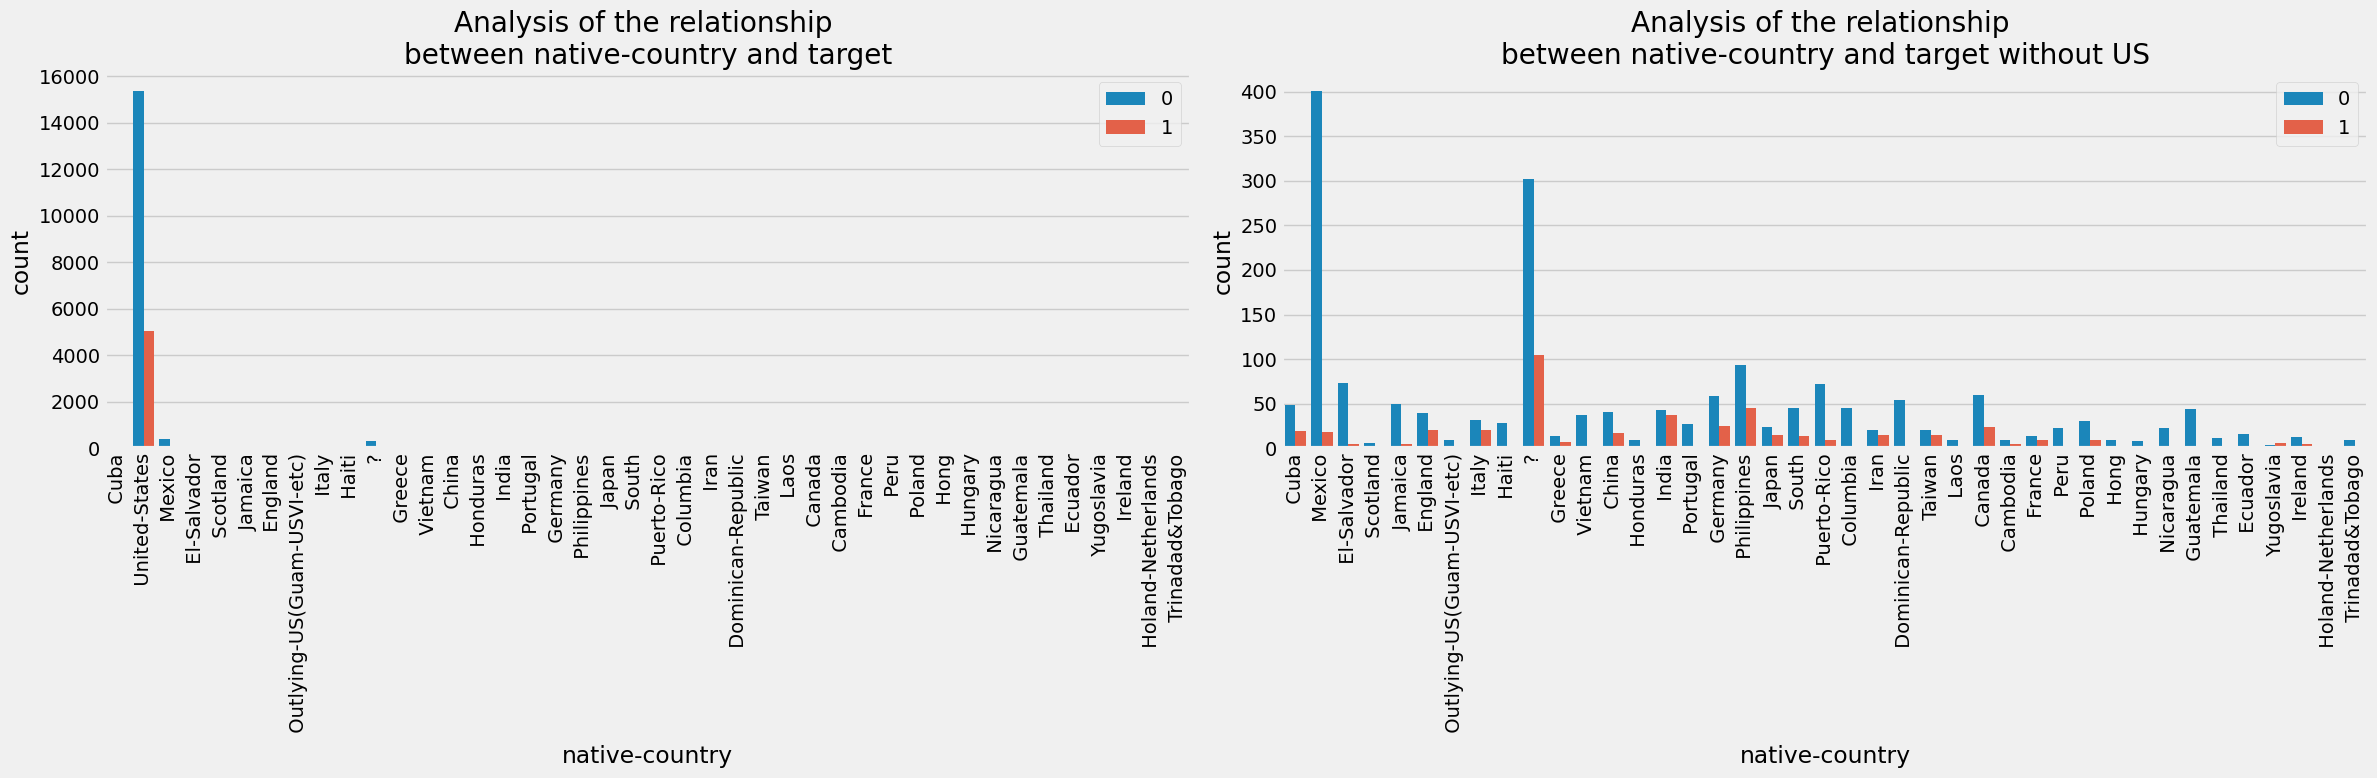

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
# native-country target의 관계 분석, 미국 데이터를 포함시켰을 때
sns.countplot(data=train_data, x='native-country', hue='income', ax=ax[0])
ax[0].legend(loc = 'upper right')
ax[0].tick_params(axis='x', labelrotation=90) #말이 길기 때문에 90도 회전을 한다.
ax[0].set_title("Analysis of the relationship \nbetween native-country and target")

# native-country target without US의 관계 분석
sns.countplot(data=train_data[train_data['native-country']!=' United-States'], x='native-country', hue='income', ax=ax[1])
ax[1].legend(loc = 'upper right')
ax[1].set_title("Analysis of the relationship \nbetween native-country and target without US")
ax[1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

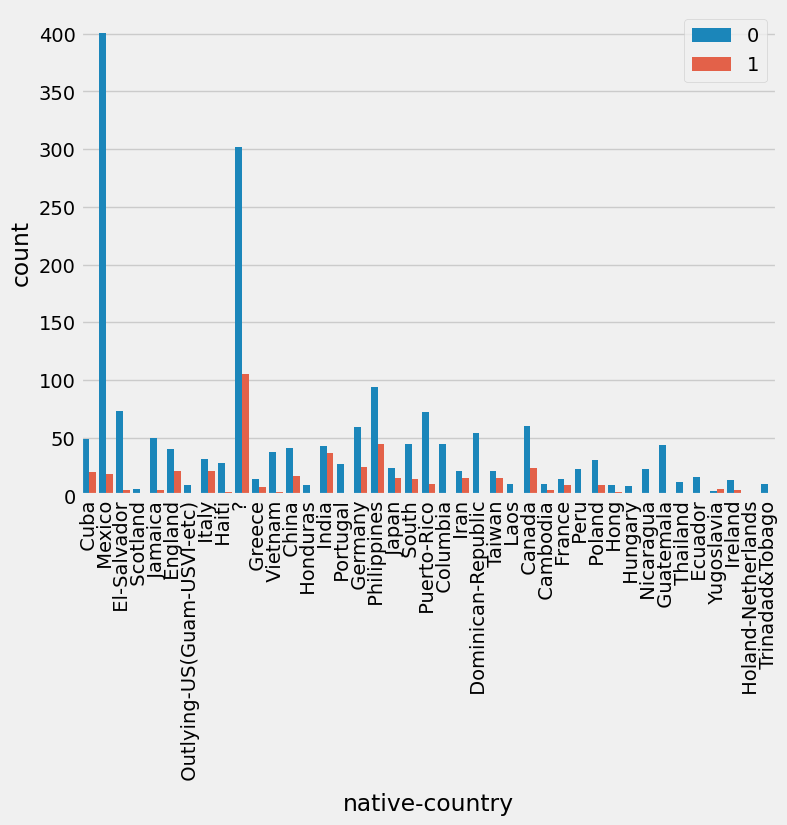

In [54]:
sns.countplot(x='native-country', hue='income', data=train_data[train_data['native-country']!=' United-States'])
plt.legend(loc="upper right")
plt.tick_params(axis='x', labelrotation=90)
plt.show()

In [75]:
train_data['native-country-bin'] = train_data['native-country'].map(lambda x: 1 if x==' United-States' else 0)

In [65]:
train_data.shape[1]

16

## DecisiontreeClassifier를 이용한 feature의 중요도 분석

In [76]:
#데이터 분석 영향을 받지 않은 경우
X = train_data.iloc[:, [0, 2, 4, 10, 11, 12, 15]]
y = train_data[['income']]

String_X = train_data[['workclass','education','marital-status', 'occupation','relationship','race','sex']]
encoder = LabelEncoder()
encoded_X = String_X.apply(encoder.fit_transform)

# X 데이터에 encode된 결과를 추가
X = pd.concat([X, encoded_X], axis=1)

In [77]:
#decision tree를 이용해서 어떤 feature가 제일 영향력이 있는 feature인 지 확인하기. 
dt_clf = DecisionTreeClassifier(random_state=1004)

#dt_clf_model = dt_clf.fit(X,y)
cv_scores = cross_val_score(dt_clf, X,y,cv=5)
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

dt_clf_model = dt_clf.fit(X,y)
print(dt_clf_model.feature_importances_) 

#모델의 정확도는 80%이다.

Cross-validation scores: [0.80565914 0.81509103 0.81066257 0.80298376 0.80517771]
Average accuracy: 0.8079148420287623
[0.11583877 0.20772429 0.11612653 0.11169476 0.03585725 0.07113679
 0.00875372 0.03323085 0.01488962 0.00865029 0.05956024 0.19811725
 0.01460984 0.00380979]


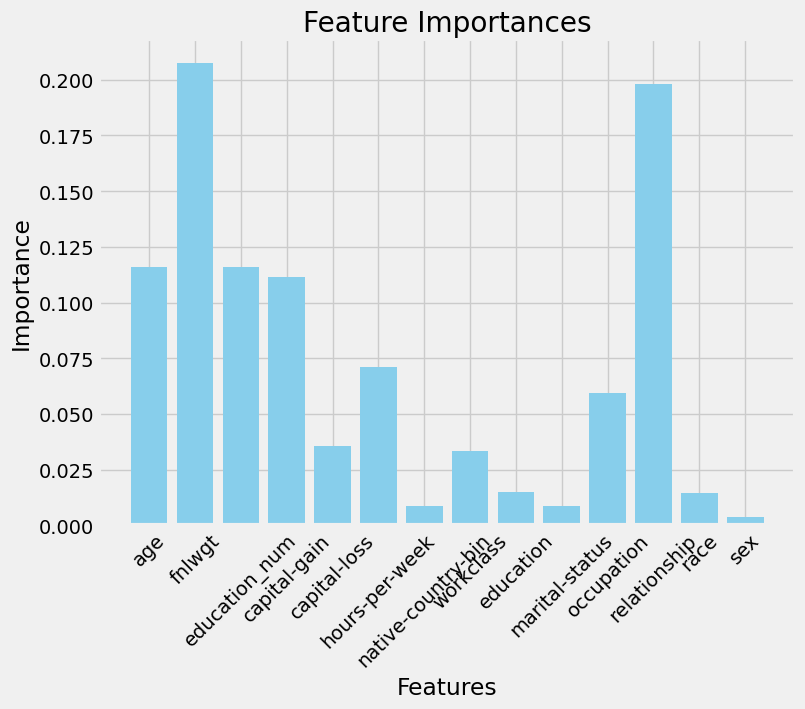

In [78]:
features = X.columns
importances = dt_clf_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='skyblue')
plt.tick_params(axis='x', labelrotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [79]:
#데이터 분석 영향을 받은 경우
X = train_data.iloc[:, [0, 4, 10, 11, 15]]
y = train_data[['income']]

String_X = train_data[['workclass','education','marital-status', 'occupation','relationship']]
encoder = LabelEncoder()
encoded_X = String_X.apply(encoder.fit_transform)

# X 데이터에 encode된 결과를 추가
X = pd.concat([X, encoded_X], axis=1)

In [80]:
#decision tree를 이용해서 어떤 feature가 제일 영향력이 있는 feature인 지 확인하기. 
dt_clf = DecisionTreeClassifier(random_state=1004)

#dt_clf_model = dt_clf.fit(X,y)
cv_scores = cross_val_score(dt_clf, X,y,cv=5)
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

dt_clf_model = dt_clf.fit(X,y)
print(dt_clf_model.feature_importances_) 

#모델의 정확도는 80%이다.

Cross-validation scores: [0.81925861 0.82518096 0.80824923 0.8093462  0.82316806]
Average accuracy: 0.8170406125682282
[0.19630837 0.15061464 0.14406478 0.05095476 0.02065794 0.06636778
 0.02907075 0.01306457 0.08730404 0.24159238]


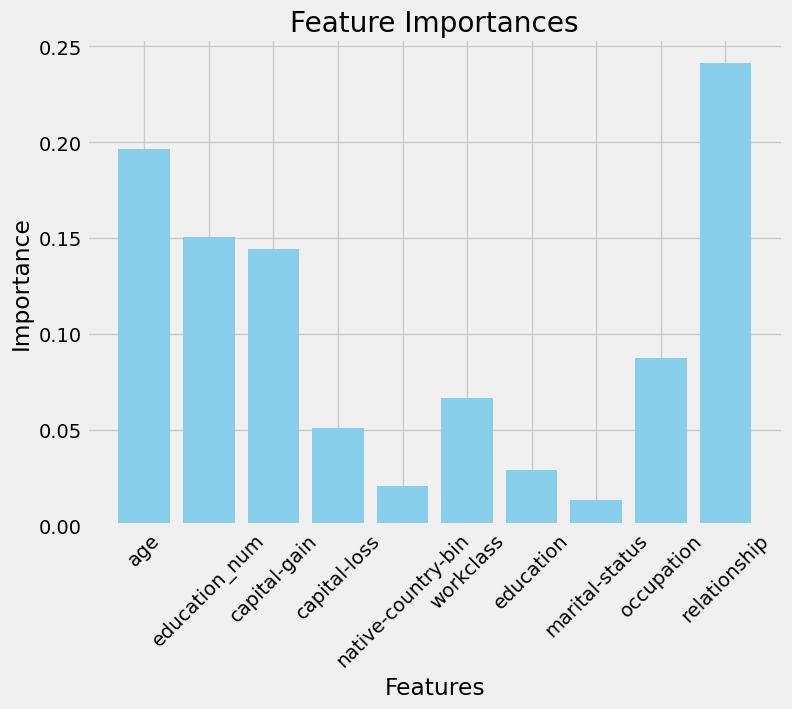

In [81]:
features = X.columns
importances = dt_clf_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='skyblue')
plt.tick_params(axis='x', labelrotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering
- 